### why and how Unsupervised Learning?

#### **Objective**
The main objective of applying **PCA** and **K-Means** to the EuroSAT dataset is to:
1. **Understand the data structure**: Using **PCA** to reduce dimensionality and visualize high-dimensional satellite image data in a lower-dimensional space.
2. **Unsupervised grouping**: Employing **K-Means clustering** to identify potential patterns or similarities in the dataset by grouping the data into distinct clusters, purely based on the feature space (without any labels).

---

### **Why PCA?**
- **Dimensionality Reduction**:
  - Satellite image datasets, like EuroSAT, typically have high-dimensional feature spaces. Each image in EuroSAT has dimensions `(64, 64, 3)` and is flattened into a vector with over 12,000 features.
  - Such high-dimensional data can be computationally expensive to process and visualize.
  - **PCA** reduces the number of dimensions while retaining most of the variance in the data, simplifying subsequent analysis.
  
- **Noise Reduction**:
  - PCA helps eliminate redundant features, improving clustering performance by focusing on the most important variations in the dataset.
  
- **Visualization**:
  - PCA enables us to project high-dimensional data into 2D or 3D for easy visualization, which is essential for exploring cluster formations.

---

### **Why K-Means?**
- **Clustering Objective**:
  - K-Means is a widely used clustering algorithm in unsupervised learning. It partitions the data into `k` clusters by minimizing the within-cluster variance.
  - It helps us discover natural groupings or structures in the dataset.

- **Interpretability**:
  - By clustering the PCA-reduced features, we can visualize how the data points are distributed and grouped, providing valuable insights into the dataset.

- **Silhouette Score**:
  - The silhouette score was used to evaluate the quality of clustering. A higher score indicates that the data points are well-clustered and separated.

---

### **What We Achieved**
1. **Dimensionality Reduction with PCA**:
   - The high-dimensional EuroSAT dataset was reduced to 50 principal components, retaining most of the information in the data while improving computational efficiency.
   - The first two principal components were used to visualize the dataset in 2D.

2. **Unsupervised Clustering with K-Means**:
   - K-Means grouped the PCA-reduced data into distinct clusters, where each cluster represents a potential category or feature similarity within the dataset.
   - We plotted the clusters in 2D to visualize how the images are grouped in the reduced feature space.

3. **Evaluation**:
   - A silhouette score was calculated to assess the clustering performance.
   - Clustering performance was also visualized by plotting the cluster centers and observing the data distribution.

---



In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define dataset directory
data_dir = r"C:\Users\neloya\OneDrive\Datasets\EuroSat"

# Get class directories
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print("Classes:", classes)


Classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [4]:
# Load images and labels manually
images, labels = [], []
for cls in classes:
    cls_dir = os.path.join(data_dir, cls)
    for img_file in os.listdir(cls_dir)[:10]:  # Load a few images from each class
        img_path = os.path.join(cls_dir, img_file)
        img = Image.open(img_path).resize((64, 64))
        images.append(np.array(img))
        labels.append(cls)

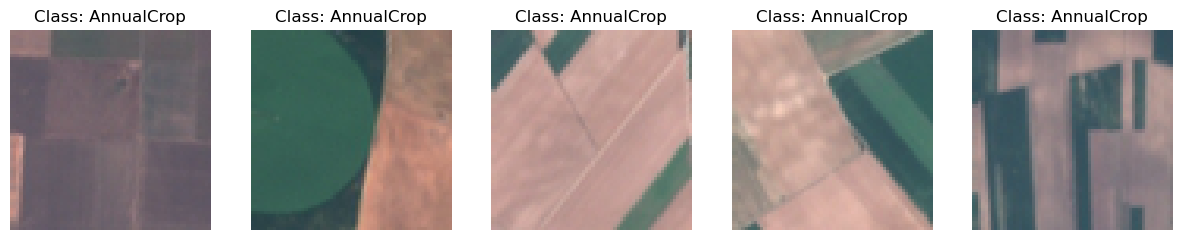

In [6]:
# Visualize a few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(f"Class: {labels[i]}")
    ax.axis("off")
plt.show()

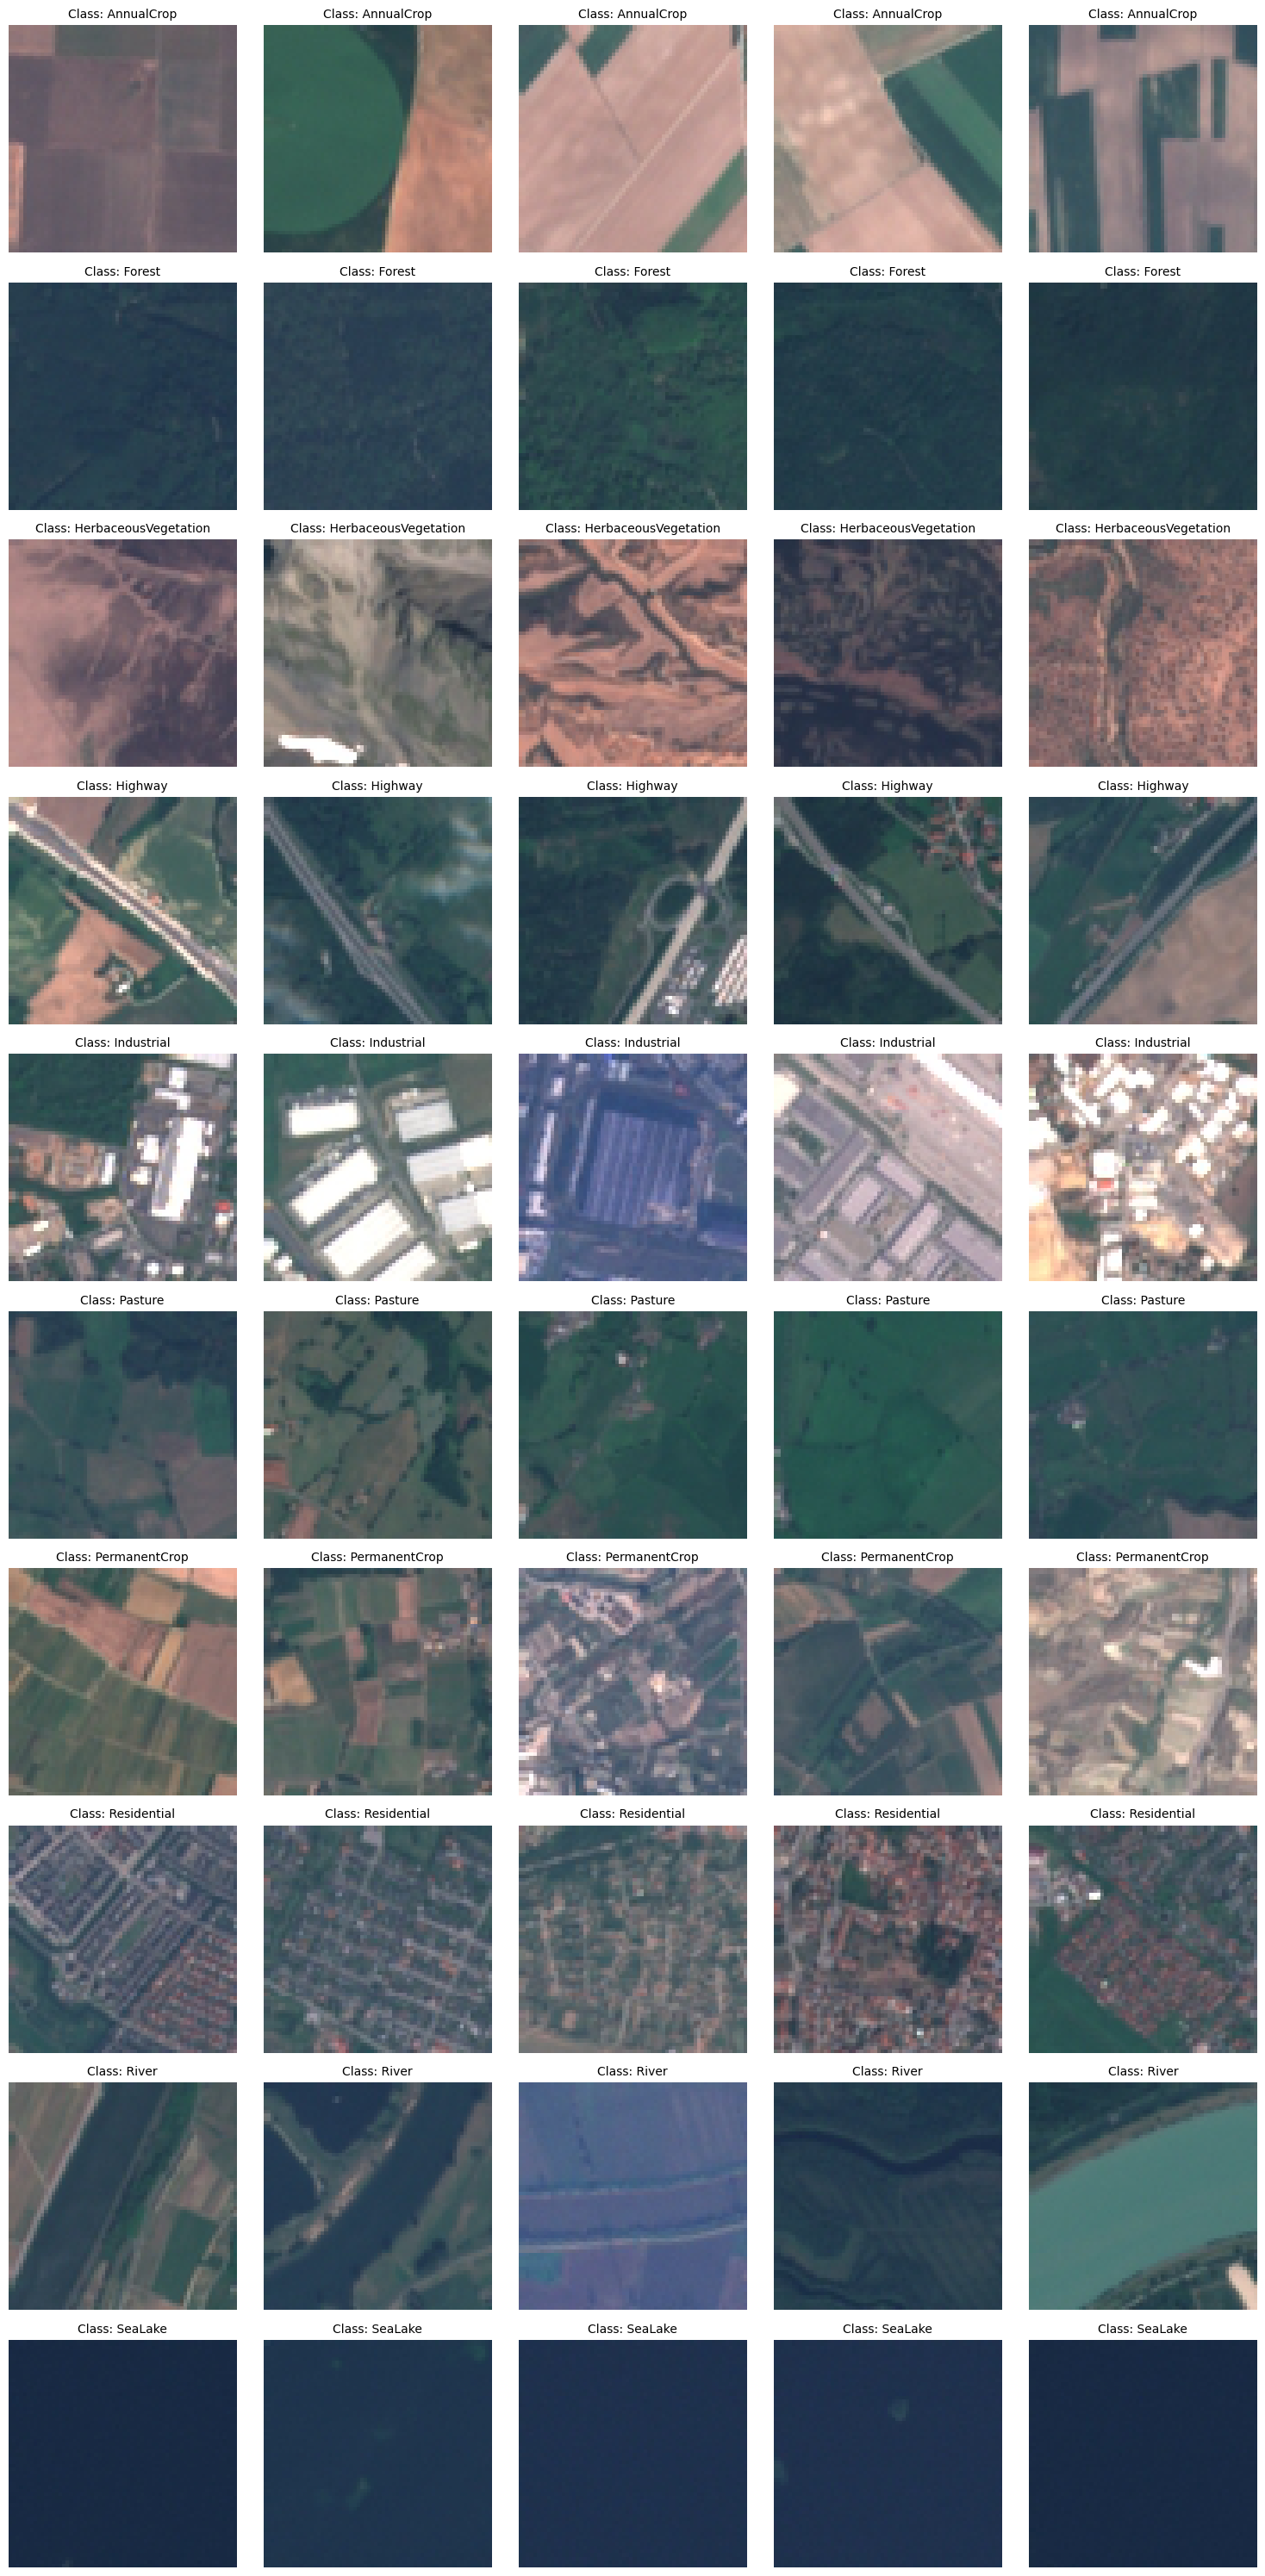

In [14]:
# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Plot samples from each class
fig, axes = plt.subplots(len(classes), 5, figsize=(15, len(classes) * 3))

for i, cls in enumerate(classes):
    cls_indices = np.where(labels == cls)[0]
    for j, idx in enumerate(cls_indices[:5]):  # Show up to 5 images per class
        ax = axes[i, j]
        ax.imshow(images[idx])
        ax.set_title(f"Class: {cls}", fontsize=10)
        ax.axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

In [22]:
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Load images and labels
images, labels = [], []
for cls in classes:
    cls_dir = os.path.join(data_dir, cls)
    for img_file in os.listdir(cls_dir)[:50]:  # Load up to 50 images per class
        img_path = os.path.join(cls_dir, img_file)
        img = Image.open(img_path).resize((64, 64))  # Resize to 64x64
        images.append(np.array(img))  # Keep original 3D shape for visualization
        labels.append(cls)

# Convert to numpy arrays
images = np.array(images)  # Shape: (n_samples, 64, 64, 3)
labels = np.array(labels)  # Shape: (n_samples,)

# Flatten images for PCA
images_flattened = images.reshape(images.shape[0], -1)  # Shape: (n_samples, 64*64*3)

# Normalize the images to [0, 1]
images_flattened = images_flattened / 255.0

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Reduce to 50 components
images_pca = pca.fit_transform(images_flattened)

Explained Variance Ratio for the First 10 Components:
Component 1: 0.6218
Component 2: 0.0362
Component 3: 0.0257
Component 4: 0.0202
Component 5: 0.0161
Component 6: 0.0124
Component 7: 0.0110
Component 8: 0.0101
Component 9: 0.0085
Component 10: 0.0081


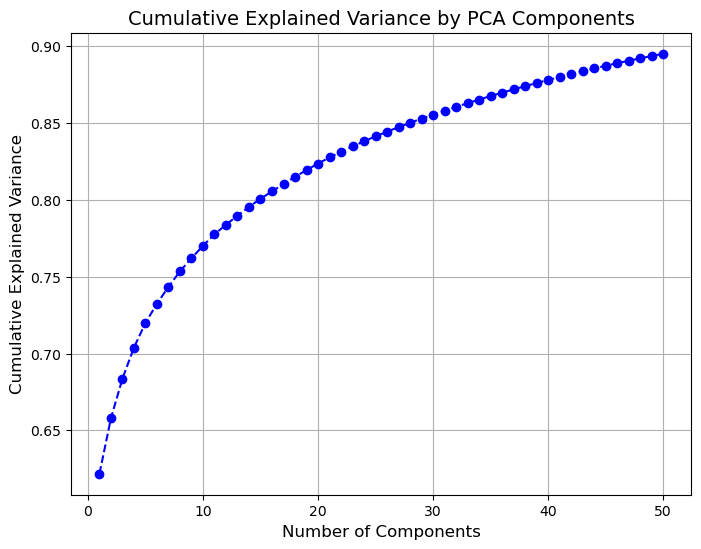

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Display explained variance ratio for the first 10 components
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for the First 10 Components:")
for i, var in enumerate(explained_variance[:10]):
    print(f"Component {i+1}: {var:.4f}")

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components', fontsize=14)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid(True)
plt.show()


### PCA Results

#### **1. Explained Variance Ratio**
- The **explained variance ratio** indicates the proportion of the total variance in the dataset that is captured by each principal component.
- For example:
  - If Component 1 has an explained variance ratio of 0.30, it means that this component alone captures 30% of the variance in the dataset.
  - The explained variance ratio helps to understand which components contribute the most to explaining the variability in the data.

#### **2. Cumulative Explained Variance**
- The **cumulative explained variance** is the sum of the explained variance ratios of the components up to a certain point.
- It shows how much total variance is retained as more components are added.
- For example:
  - If the first 10 components together have a cumulative explained variance of 95%, it means that these 10 components retain 95% of the information in the original dataset.

#### **3. Visualizing Results**
- A **cumulative explained variance plot** is used to determine the number of principal components required to capture a desired level of variance (e.g., 90% or 95%).
- The plot typically shows:
  - **X-axis**: Number of principal components.
  - **Y-axis**: Cumulative explained variance.

#### **Why PCA is Useful**
- PCA helps reduce the dimensionality of the data while retaining most of the information.
- This is useful for:
  - Improving computational efficiency.
  - Visualizing high-dimensional data in 2D or 3D.
  - Mitigating overfitting in machine learning models by removing noise and redundancy.


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Silhouette Score: 0.14


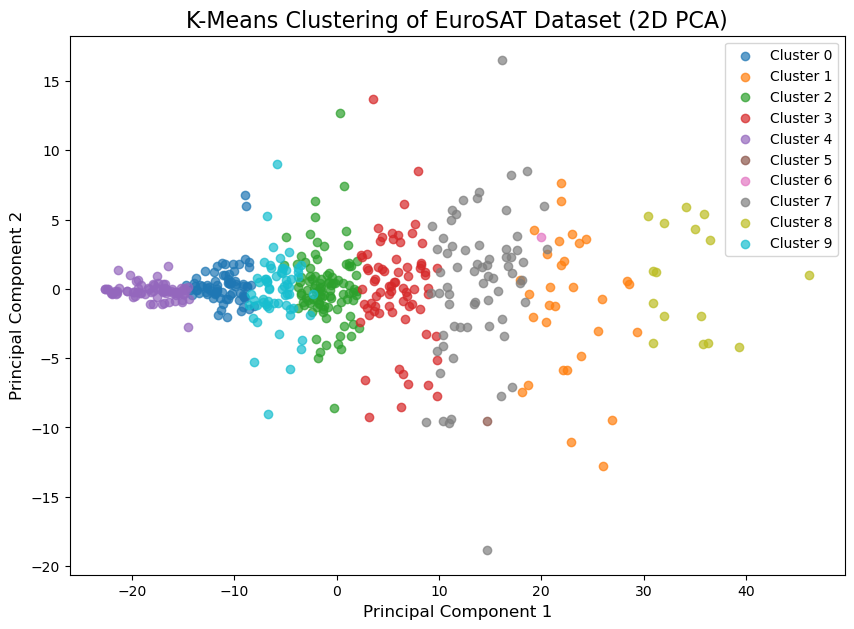

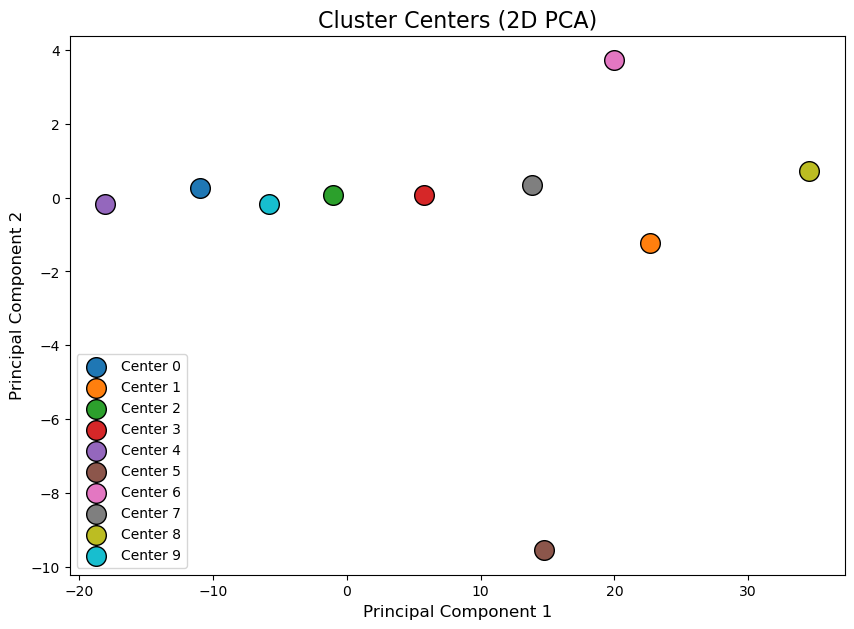

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply K-Means clustering on PCA-reduced data
kmeans = KMeans(n_clusters=len(classes), random_state=42)  # Number of clusters = number of classes
cluster_labels = kmeans.fit_predict(images_pca)

# Silhouette Score
silhouette_avg = silhouette_score(images_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Visualize K-Means Clusters in 2D (using the first two PCA components)
plt.figure(figsize=(10, 7))
for cluster in range(len(classes)):
    cluster_indices = np.where(cluster_labels == cluster)[0]
    plt.scatter(images_pca[cluster_indices, 0], 
                images_pca[cluster_indices, 1], 
                label=f"Cluster {cluster}", alpha=0.7)
plt.title("K-Means Clustering of EuroSAT Dataset (2D PCA)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend()
plt.show()

# Visualize cluster centers
plt.figure(figsize=(10, 7))
for i, center in enumerate(kmeans.cluster_centers_):
    plt.scatter(center[0], center[1], label=f"Center {i}", s=200, edgecolor="black")
plt.title("Cluster Centers (2D PCA)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend()
plt.show()


### K-Means Clustering on PCA-Reduced EuroSAT Dataset

#### **Steps Performed**

1. **Dimensionality Reduction**:
   - The EuroSAT dataset was reduced to 50 dimensions using PCA to simplify clustering and improve computational efficiency.

2. **K-Means Clustering**:
   - K-Means was applied to group the data into clusters equal to the number of original classes (e.g., 10 classes).
   - The algorithm iteratively assigns data points to clusters and adjusts cluster centers to minimize within-cluster variance.

3. **Silhouette Score**:
   - The silhouette score was calculated to evaluate the clustering performance.
   - A higher score indicates better-defined clusters.

4. **Visualization**:
   - A 2D scatter plot of the PCA-reduced dataset was created, with points colored according to their assigned clusters.
   - The cluster centers were visualized on a separate plot to show the central points for each cluster.

#### **Key Insights**
- K-Means grouped the EuroSAT data points into distinct clusters without using labels.
- The 2D scatter plot demonstrates how the data points are distributed across clusters in the reduced feature space.
- The silhouette score provides a quantitative measure of the clustering performance.



### **Summary**
- PCA was used for dimensionality reduction, noise removal, and visualization.
- K-Means clustering was applied to identify patterns or groupings within the data in an unsupervised manner.
- Together, PCA and K-Means provided a framework to explore, understand, and analyze the structure of the EuroSAT dataset without relying on labels.